# Lab13: Stock price prediction
### Réalisé par: Dalal AZIZ  dalalaziz16@gmail.com
### EMSI 2024/2025


# T.A.F
1. Démarrer 
2. Analyser
3. Améliorer

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense


In [18]:
from sklearn.preprocessing import MinMaxScaler

#from tensorflow.python.keras.preprocessing import MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#from scipy.sparse import issparse
scaler = MinMaxScaler()
print(scaler)


MinMaxScaler()


# Step 1: Dataset
 url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [19]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train)
# Data transformation
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)
X_train = []
y_train = []
for i in range(30, 2035):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

# Step 2: Model

In [20]:
# Initialize the RNN model
model = Sequential()

# Add the first SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add the third SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth SimpleRNN layer without return_sequences
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

# Add the Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 3: train

In [22]:
model.fit(X_train,y_train,epochs=20,batch_size=62)
#use 300

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1492
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1153
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0911
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0628
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0532
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0366
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0327
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0260
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0236
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0194
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0206
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0156
Epoch 13/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0160
Epoch 14/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0135
Epoch 15/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0133
Epoc

# Step 4: test
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


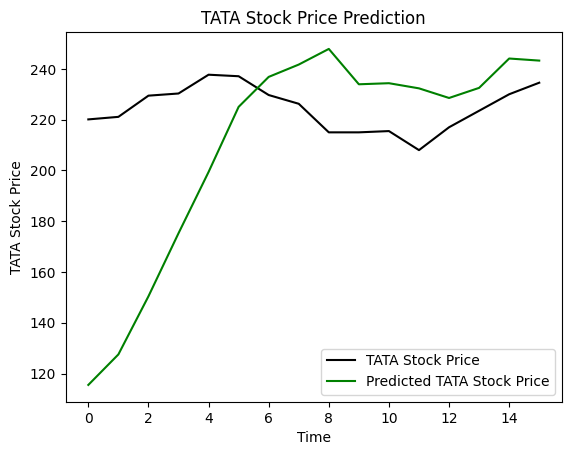

In [23]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 46):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

#  save the model

In [24]:
model.save('tata_model.h5')